In [ ]:
# %pip install Pillow
# %pip install pydicom
# %pip install scipy

# %pip install shutil

# %pip install nibabel

# %pip install numpy

# %pip install imageio

# !chmod +x nii2png

# pip install nii2png as nii2
# %pip install split-folders



import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

Getting No of Cases

In [10]:
df = os.listdir('/kaggle/input/rsna-miccai-brain-tumor-radiogenomic-classification/train')
len(df)

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/rsna-miccai-brain-tumor-radiogenomic-classification/train'

Downloading the library for the conversion of dcm to niix

In [ ]:
# !apt-get update
# !apt-get install -y dcm2niix


Converting the niix to png image

In [ ]:
# import scipy, numpy, shutil, os, nibabel
# import sys, getopt

# import imageio
# import numpy as np

# def main(argv,input_file, output_file):
#     inputfile = input_file
#     outputfile = output_file
# #     try:
# #         opts, args = getopt.getopt(argv,"hi:o:",["ifile=","ofile="])
# #     except getopt.GetoptError:
# #         print('nii2png.py -i <inputfile> -o <outputfile>')
# #         sys.exit(2)
# #     for opt, arg in opts:
# #         if opt == '-h':
# #             print('nii2png.py -i <inputfile> -o <outputfile>')
# #             sys.exit()
# #         elif opt in ("-i", "--input"):
# #             inputfile = arg
# #         elif opt in ("-o", "--output"):
# #             outputfile = arg

#     print('Input file is ', inputfile)
#     print('Output folder is ', outputfile)

#     # set fn as your 4d nifti file
#     image_array = nibabel.load(inputfile).get_fdata()
#     print(len(image_array.shape))

#     # ask if rotate
#     ask_rotate = input('Would you like to rotate the orientation? (y/n) ')

# #     if ask_rotate.lower() == 'y':
# #         ask_rotate_num = int(input('OK. By 90° 180° or 270°? '))
# #         if ask_rotate_num == 90 or ask_rotate_num == 180 or ask_rotate_num == 270:
# #             print('Got it. Your images will be rotated by {} degrees.'.format(ask_rotate_num))
# #         else:
# #             print('You must enter a value that is either 90, 180, or 270. Quitting...')
# #             sys.exit()
# #     elif ask_rotate.lower() == 'n':
# #         print('OK, Your images will be converted it as it is.')
# #     else:
# #         print('You must choose either y or n. Quitting...')
# #         sys.exit()

#     # if 4D image inputted
#     if len(image_array.shape) == 4:
#         # set 4d array dimension values
#         nx, ny, nz, nw = image_array.shape

#         # set destination folder
#         if not os.path.exists(outputfile):
#             os.makedirs(outputfile)
#             print("Created ouput directory: " + outputfile)

#         print('Reading NIfTI file...')

#         total_volumes = image_array.shape[3]
#         total_slices = image_array.shape[2]

#         # iterate through volumes
#         for current_volume in range(0, total_volumes):
#             slice_counter = 0
#             # iterate through slices
#             for current_slice in range(0, total_slices):
#                 if (slice_counter % 1) == 0:
#                     # rotate or no rotate
# #                     if ask_rotate.lower() == 'y':
# #                         if ask_rotate_num == 90 or ask_rotate_num == 180 or ask_rotate_num == 270:
# #                             print('Rotating image...')
# #                             if ask_rotate_num == 90:
# #                                 data = numpy.rot90(image_array[:, :, current_slice, current_volume])
# #                             elif ask_rotate_num == 180:
# #                                 data = numpy.rot90(numpy.rot90(image_array[:, :, current_slice, current_volume]))
# #                             elif ask_rotate_num == 270:
# #                                 data = numpy.rot90(numpy.rot90(numpy.rot90(image_array[:, :, current_slice, current_volume])))
# #                     elif ask_rotate.lower() == 'n':
#                     data = image_array[:, :, current_slice, current_volume]
                            
#                     #alternate slices and save as png
#                     print('Saving image...')
#                     image_name = inputfile[:-4] + "_t" + "{:0>3}".format(str(current_volume+1)) + "_z" + "{:0>3}".format(str(current_slice+1))+ ".png"
#                     imageio.imwrite(image_name, data)
#                     print('Saved.')

#                     #move images to folder
#                     print('Moving files...')
#                     src = image_name
#                     shutil.move(src, outputfile)
#                     slice_counter += 1
#                     print('Moved.')

#         print('Finished converting images')

#     # else if 3D image inputted
#     elif len(image_array.shape) == 3:
#         # set 4d array dimension values
#         nx, ny, nz = image_array.shape

#         # set destination folder
#         if not os.path.exists(outputfile):
#             os.makedirs(outputfile)
#             print("Created ouput directory: " + outputfile)

#         print('Reading NIfTI file...')

#         total_slices = image_array.shape[2]

#         slice_counter = 0
#         # iterate through slices
#         for current_slice in range(0, total_slices):
#             # alternate slices
#             if (slice_counter % 1) == 0:
#                 # rotate or no rotate
# #                 if ask_rotate.lower() == 'y':
# #                     if ask_rotate_num == 90 or ask_rotate_num == 180 or ask_rotate_num == 270:
# #                         if ask_rotate_num == 90:
# #                             data = numpy.rot90(image_array[:, :, current_slice])
# #                         elif ask_rotate_num == 180:
# #                             data = numpy.rot90(numpy.rot90(image_array[:, :, current_slice]))
# #                         elif ask_rotate_num == 270:
# #                             data = numpy.rot90(numpy.rot90(numpy.rot90(image_array[:, :, current_slice])))
# #                 elif ask_rotate.lower() == 'n':
#                 data = image_array[:, :, current_slice]
#                 data_normalized = (data - np.min(data)) / (np.max(data) - np.min(data)) * 255
#                 data = data_normalized.astype(np.uint8)
#                 # data=data.astype(np.uint8)
#                 #alternate slices and save as png
#                 if (slice_counter % 1) == 0:
#                     print('Saving image...')
#                     image_name = inputfile[:-4] + "_z" + "{:0>3}".format(str(current_slice+1))+ ".png"
#                     imageio.imwrite(image_name, data)
#                     print('Saved.')

#                     #move images to folder
#                     print('Moving image...')
#                     src = image_name
#                     shutil.move(src, outputfile)
#                     slice_counter += 1
#                     print('Moved.')

#         print('Finished converting images')
#     else:
#         print('Not a 3D or 4D Image. Please try again.')

# # # call the function to start the program
# # if __name__ == "__main__":
# #    main(sys.argv[1:])

    

In [ ]:
# def conver_niix_to_png(data_dire , output_path):
#     input_file=data_dire
#     main(sys.argv,input_file,output_path)
    


In [ ]:
# conver_niix_to_png("/kaggle/input/t1w-niix/3D-mri/00000/T1w_T1w_0_8.nii","/kaggle/working/")
# conver_niix_to_png("/kaggle/input/t1w-niix/3D-mri/00000/T1w_T1w_0_8.nii","/kaggle/working/")

Removing Pitch Black Images

In [11]:
# from PIL import Image

# def remove_blank_images(base_dir,output_folders):
#     folders=os.listdir(base_dir)
#     for folder in folders:
#         images=os.listdir(os.path.join(base_dir,folder))
#         output_folder=f"{output_folders}/{folder}"
#         os.makedirs(output_folder,exist_ok=True)
#         for image in images:
#             image_size=os.path.getsize(os.path.join(base_dir,folder,image))
#             if image_size>1000:                
#                 image_array=Image.open(os.path.join(base_dir,folder,image))
#                 # Save it to the output directory with a new name
#                 image_array.save(os.path.join(output_folder,image))
#         print(folder,"Done")
            

In [12]:
# os.makedirs("/kaggle/working/niix2png2/")
# remove_blank_images("/kaggle/input/niix2png/nii2png_Ex2","/kaggle/working/niix2png2/")

Reading the csv file

In [13]:
# csv_file = '/kaggle/input/rsna-miccai-brain-tumor-radiogenomic-classification/train_labels.csv'

# Load the CSV file into a DataFrame
# df = pd.read_csv(csv_file)
# print(df)

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/rsna-miccai-brain-tumor-radiogenomic-classification/train_labels.csv'

classification of folder for tumor ans Non-tumor

In [ ]:
# import os
# import shutil
# import pandas as pd

# # Path to the folder containing the images
# image_folder = '/kaggle/working/niix2png2'
# # Path to the CSV file containing image names and labels
# csv_file = '/kaggle/input/rsna-miccai-brain-tumor-radiogenomic-classification/train_labels.csv'

# # Load the CSV file into a DataFrame
# df = pd.read_csv(csv_file)
# image_folder_class="/kaggle/working/"
# # Create directories for class 1 and class 0 if they don't exist
# class_1_dir = os.path.join(image_folder_class, 'Tumor')
# class_0_dir = os.path.join(image_folder_class, 'No_Tumor')

# os.makedirs(class_1_dir, exist_ok=True)
# os.makedirs(class_0_dir, exist_ok=True)

# # Loop through the DataFrame rows
# for index, row in df.iterrows():
#     image_name = str(row['BraTS21ID'])
#     label = row['MGMT_value']
#     print(len(image_name))
#     if len(image_name)<5:
#         image_name=str((5-len(image_name))*"0"+image_name)
        
        
#     # Get the full path to the image
#     src_path = os.path.join(image_folder, image_name)
    
#     if label == 1:
#         # Move image to class_1 directory
#         dst_path = os.path.join(class_1_dir, image_name)
#     else:
#         # Move image to class_0 directory
#         dst_path = os.path.join(class_0_dir, image_name)
    
#     # Check if the image exists before moving
#     if os.path.exists(src_path):
#         shutil.move(src_path, dst_path)
#         print(f'Moved {image_name} to {dst_path}')
#     else:
#         print(f'Image {image_name} not found in the folder.')

# print("All images labeled and moved to respective folders.")


Moving Tumor and No Tumor in a folder

In [ ]:
# import shutil


# src_folder = '/kaggle/working/No_Tumor'

# dst_folder = "/kaggle/working/data_set"

# shutil.move(src_folder, dst_folder)

Getting Traning and Validation Data

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1./255)

training_set=train_datagen.flow_from_directory(
         '/kaggle/input/train-and-val-dataset-for-tumor-classification/output_folder/train',
          target_size=(64,64),
          batch_size=126,
          class_mode='binary')

validation_set=test_datagen.flow_from_directory(
         '/kaggle/input/train-and-val-dataset-for-tumor-classification/output_folder/val',
          target_size=(64,64),
          batch_size=15,
          class_mode='binary')

# test_set=test_datagen.flow_from_directory(
#          '/kaggle/input/2d-mri1/archive/Testing',
#         target_size=(64,64),
#           class_mode='binary')


Found 44821 images belonging to 2 classes.
Found 11502 images belonging to 2 classes.


Splitting The data

In [ ]:
# import splitfolders

# # Specify the dataset folder path
# input_folder = "./data_set/No_Tumor"

# # Split the dataset into train (80%) and test (20%)
# splitfolders.ratio(input_folder, output="output_folder/train",
#                    seed=1337, ratio=(.8, .2), 
#                    group_prefix=None)  # The default split is train/test



In [ ]:
# import shutil

# # Path to the directory you want to remove
# dir_path = '/kaggle/working/00688'

# # Remove the directory and all its contents
# shutil.rmtree(dir_path)

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam

# Build a CNN model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten for fully connected layers
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout to prevent overfitting

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,329 (2.61 MB)

 Trainable params: 683,329 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Train the model
history = model.fit(
    training_set,
    epochs=20,
    batch_size=32,
    validation_data= validation_set
)

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1728902748.246606     108 service.cc:145] XLA service 0x7dbcbc004e60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728902748.246670     108 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  1/356 ━━━━━━━━━━━━━━━━━━━━ 1:08:34 12s/step - accuracy: 0.5635 - loss: 0.6868

I0000 00:00:1728902752.325167     108 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


356/356 ━━━━━━━━━━━━━━━━━━━━ 313s 848ms/step - accuracy: 0.5524 - loss: 0.6872 - val_accuracy: 0.5765 - val_loss: 0.6799
Epoch 2/20
356/356 ━━━━━━━━━━━━━━━━━━━━ 96s 265ms/step - accuracy: 0.5729 - loss: 0.6807 - val_accuracy: 0.5768 - val_loss: 0.6774
Epoch 3/20
356/356 ━━━━━━━━━━━━━━━━━━━━ 95s 264ms/step - accuracy: 0.5776 - loss: 0.6781 - val_accuracy: 0.5792 - val_loss: 0.6740
Epoch 4/20
356/356 ━━━━━━━━━━━━━━━━━━━━ 97s 267ms/step - accuracy: 0.5845 - loss: 0.6741 - val_accuracy: 0.5795 - val_loss: 0.6723
Epoch 5/20
356/356 ━━━━━━━━━━━━━━━━━━━━ 97s 269ms/step - accuracy: 0.5911 - loss: 0.6693 - val_accuracy: 0.5893 - val_loss: 0.6644
Epoch 6/20
356/356 ━━━━━━━━━━━━━━━━━━━━ 99s 274ms/step - accuracy: 0.5957 - loss: 0.6623 - val_accuracy: 0.5960 - val_loss: 0.6594
Epoch 7/20
356/356 ━━━━━━━━━━━━━━━━━━━━ 95s 263ms/step - accuracy: 0.6054 - loss: 0.6540 - val_accuracy: 0.6112 - val_loss: 0.6496
Epoch 8/20
356/356 ━━━━━━━━━━━━━━━━━━━━ 97s 266ms/step - accuracy: 0.6205 - loss: 0.6449 - va

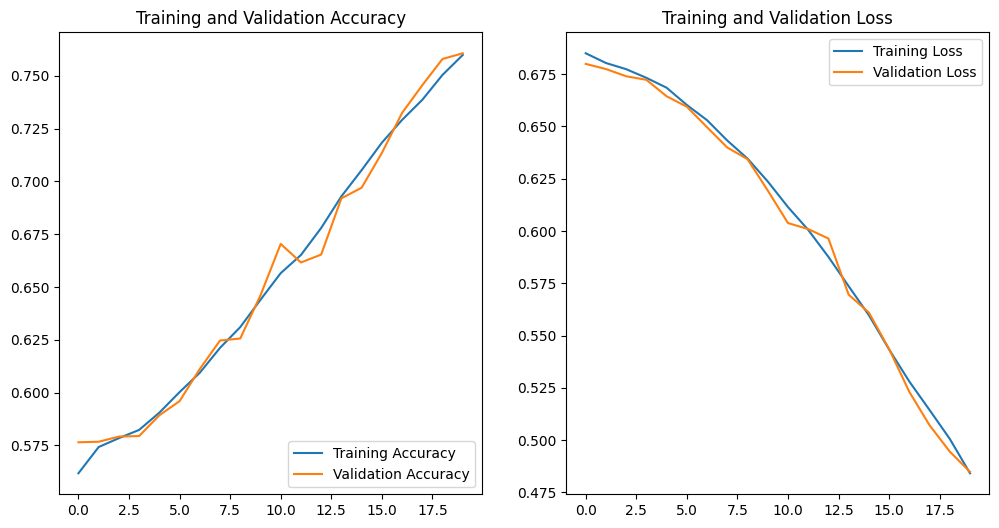

In [7]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy/loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Save the model
model.save('multi_modality_tumor_detection_model.h5')